In [38]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys
lya = 1215.67

In [39]:
# main folder where the processed files are
nside = 16
#basedir = '/Users/James/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside{}/'.format(nside)
basedir = '/Users/James/Projects/LyaCoLoRe/example_data/update_270418/'

In [40]:
pix = 1096
pix_100 = int(pix/100)
dirname = basedir+'/'+str(pix_100)+'/'+str(pix)+'/'
suffix = str(nside)+'-'+str(pix)+'.fits'
print('dir name',dirname)

dir name /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096/


In [41]:
# find QSO with highest z
gauss_dens_file = dirname+'/gaussian-colore-'+suffix
gauss_dens_hdu = fits.open(gauss_dens_file)
iskewer = np.argmax(gauss_dens_hdu[1].data['Z_COSMO'])

In [42]:
# Gaussian colore
gauss_dens_file = dirname+'/gaussian-colore-'+suffix
print('gaussian density file\n',gauss_dens_file)
gauss_dens_hdu = fits.open(gauss_dens_file)
gauss_dens_hdu.info()
zq = gauss_dens_hdu[1].data['Z_COSMO']
gauss_dens = gauss_dens_hdu[2].data
gauss_dens_zs = gauss_dens_hdu[4].data['Z']
gauss_dens_hdu.close()

gaussian density file
 /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//gaussian-colore-16-1096.fits
Filename: /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//gaussian-colore-16-1096.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU     26   11R x 6C   [E, E, E, E, E, K]   
  2  GAUSSIAN_DELTA    1 ImageHDU        13   (2048, 11)   float32   
  3  VELOCITY      1 ImageHDU        13   (2048, 11)   float32   
  4  COSMO         1 BinTableHDU     22   2048R x 4C   [E, E, E, E]   


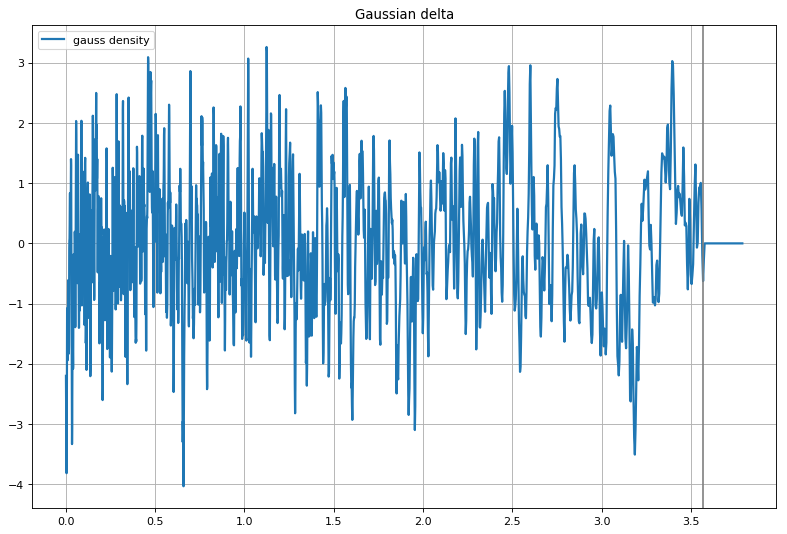

In [43]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(gauss_dens_zs,gauss_dens[iskewer],lw=2,label='gauss density')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.title('Gaussian delta')
plt.legend()
plt.grid()
plt.show()

In [44]:
# physical colore
phys_dens_file = dirname+'/physical-colore-'+suffix
print('physical density file\n',phys_dens_file)
phys_dens_hdu = fits.open(phys_dens_file)
phys_dens_hdu.info()
phys_dens = phys_dens_hdu[2].data
phys_dens_zs = phys_dens_hdu[4].data['Z']
phys_dens_hdu.close()

physical density file
 /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//physical-colore-16-1096.fits
Filename: /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//physical-colore-16-1096.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU     25   11R x 6C   [E, E, E, E, E, K]   
  2  PHYSICAL_DELTA    1 ImageHDU        12   (2048, 11)   float32   
  3  VELOCITY      1 ImageHDU        12   (2048, 11)   float32   
  4  COSMO         1 BinTableHDU     21   2048R x 4C   [E, E, E, E]   


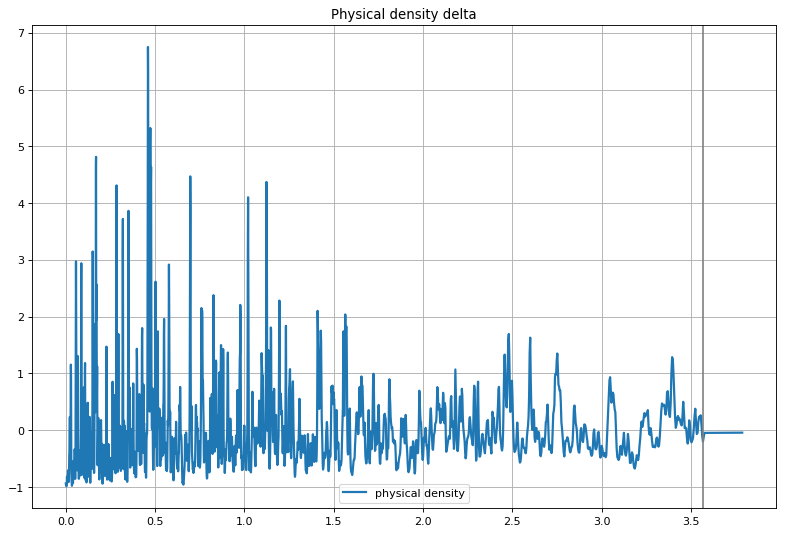

In [45]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(phys_dens_zs,phys_dens[iskewer],lw=2,label='physical density')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.title('Physical density delta')
plt.legend()
plt.grid()
plt.show()

In [60]:
# transmission
transmission_file = dirname+'/transmission-'+suffix
print('physical density file',transmission_file)
transmission_hdu = fits.open(transmission_file)
transmission_hdu.info()
zq = transmission_hdu[1].data['Z']
transmission = transmission_hdu[3].data
transmission_zs = transmission_hdu[2].data/lya - 1
DLA = transmission_hdu['DLA'].data
transmission_hdu.close()

physical density file /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//transmission-16-1096.fits
Filename: /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//transmission-16-1096.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  METADATA      1 BinTableHDU     21   9R x 4C   [E, E, E, K]   
  2  WAVELENGTH    1 ImageHDU        11   (5477,)   float64   
  3  TRANSMISSION    1 ImageHDU        12   (9, 5477)   float64   
  4  DLA           1 BinTableHDU     21   19R x 4C   [K, D, D, D]   


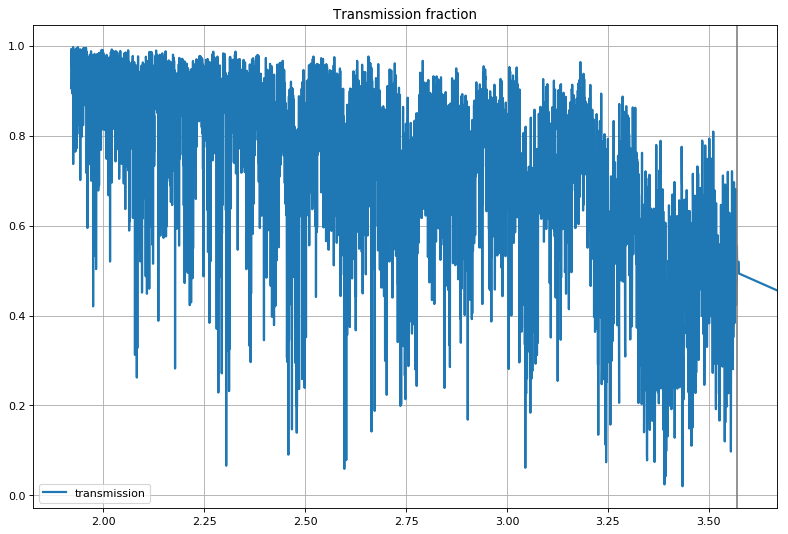

In [61]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(transmission_zs,transmission[:,iskewer],lw=2,label='transmission')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.xlim(xmax=zq[iskewer]+0.1)
plt.title('Transmission fraction')
plt.legend()
plt.grid()
plt.show()

In [62]:
print(DLA)

[( 1,  1.68376841,  0.00068094,  20.13131313)
 ( 1,  2.34621769,  0.00025641,  20.20707071)
 ( 1,  2.9669384 , -0.        ,  19.85353535)
 ( 1,  2.98640759, -0.        ,  20.33333333)
 ( 1,  3.29290913, -0.        ,  20.33333333)
 ( 1,  3.44992538, -0.        ,  20.71212121)
 ( 1,  3.71760122, -0.        ,  21.62121212)
 ( 7,  3.563902  , -0.        ,  21.36868687)
 (10,  3.64873439, -0.        ,  19.8030303 )
 (11,  0.09096068,  0.00275142,  20.98989899)
 (11,  3.0912112 , -0.00041399,  21.84848485)
 (11,  3.4430127 , -0.        ,  21.52020202)
 (12,  3.54862075, -0.        ,  20.93939394)
 (51,  1.77775039,  0.00197811,  20.96464646)
 (51,  0.76666063,  0.00197811,  20.58585859)
 (51,  2.14035589,  0.00174609,  20.83838384)
 (51,  3.58758582, -0.        ,  21.36868687)
 (51,  3.74611106, -0.        ,  21.5959596 )
 (70,  3.64185132, -0.        ,  19.7020202 )]


In [20]:
# picca gaussian
picca_gauss_file = dirname+'/picca-gaussian-'+suffix
print('picca gaussian file\n',picca_gauss_file)
picca_gauss_hdu = fits.open(picca_gauss_file)
picca_gauss_hdu.info()
zq = picca_gauss_hdu[3].data['Z']
picca_gauss_delta = picca_gauss_hdu[0].data
picca_ivar = picca_gauss_hdu[1].data
picca_gauss_ll = picca_gauss_hdu[2].data
picca_gauss_hdu.close()
lya=1215.67
picca_zs = (10**picca_gauss_ll)/lya - 1.0
sigma_G = np.std(picca_gauss_delta[:np.argmax(picca_ivar[:,iskewer]==0),iskewer])

picca gaussian file
 /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//picca-gaussian-16-1096.fits
Filename: /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//picca-gaussian-16-1096.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  METADATA      1 PrimaryHDU      11   (9, 5477)   float64   
  1  IV            1 ImageHDU        12   (9, 5477)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5477,)   float64   
  3  CATALOG       1 BinTableHDU     27   9R x 7C   [E, E, E, K, E, K, K]   


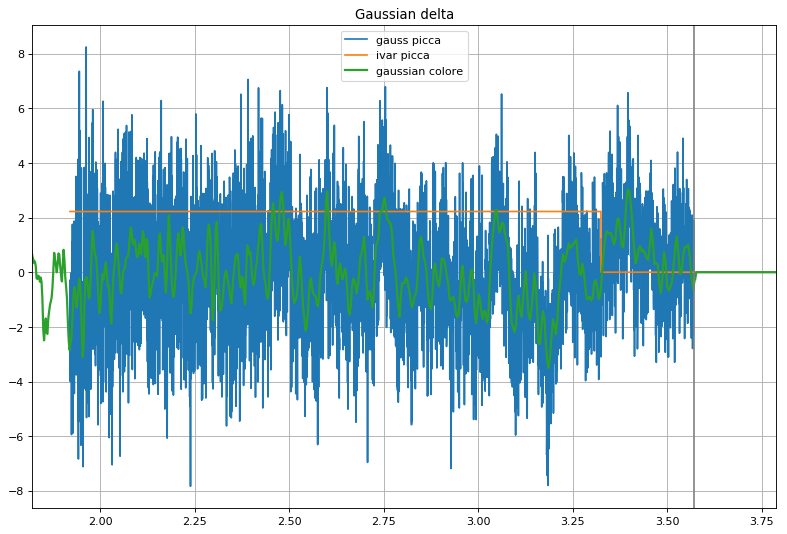

In [21]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_gauss_delta[:,iskewer],label='gauss picca')
plt.plot(picca_zs,sigma_G*picca_ivar[:,iskewer],label='ivar picca')
plt.plot(gauss_dens_zs,gauss_dens[iskewer],lw=2,label='gaussian colore')
plt.xlim(np.min(picca_zs)-0.1,np.max(picca_zs))
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.title('Gaussian delta')
plt.legend()
plt.grid()
plt.show()

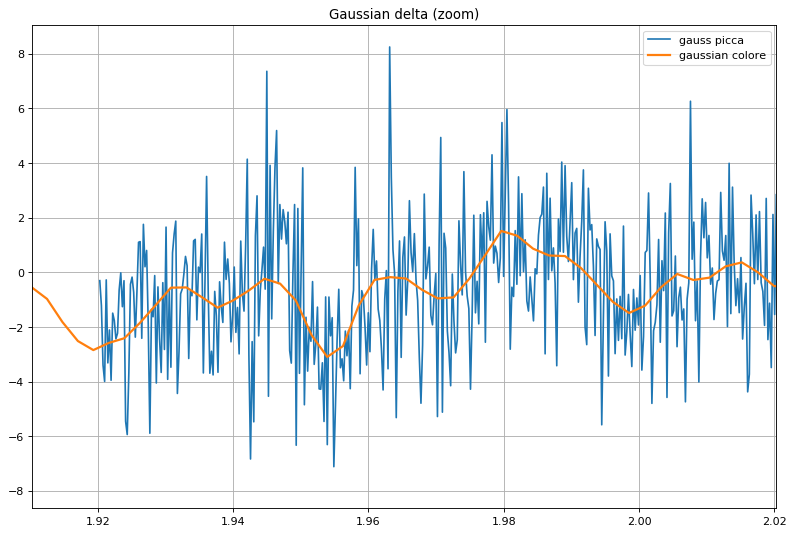

In [22]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_gauss_delta[:,iskewer],label='gauss picca')
plt.plot(gauss_dens_zs,gauss_dens[iskewer],lw=2,label='gaussian colore')
plt.xlim(np.min(picca_zs)-0.01,np.min(picca_zs)+0.1)
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.title('Gaussian delta (zoom)')
plt.legend()
plt.grid()
plt.show()

In [23]:
# picca density
picca_dens_file = dirname+'/picca-density-'+suffix
print('picca density file\n',picca_dens_file)
picca_dens_hdu = fits.open(picca_dens_file)
picca_dens_hdu.info()
picca_dens_delta = picca_dens_hdu[0].data
picca_dens_hdu.close()
sigma_D = np.std(picca_dens_delta[:np.argmax(picca_ivar[:,iskewer]==0),iskewer])

picca density file
 /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//picca-density-16-1096.fits
Filename: /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//picca-density-16-1096.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  CATALOG       1 PrimaryHDU      11   (9, 5477)   float32   
  1  IV            1 ImageHDU        12   (9, 5477)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5477,)   float64   
  3  CATALOG       1 BinTableHDU     27   9R x 7C   [E, E, E, K, E, K, K]   


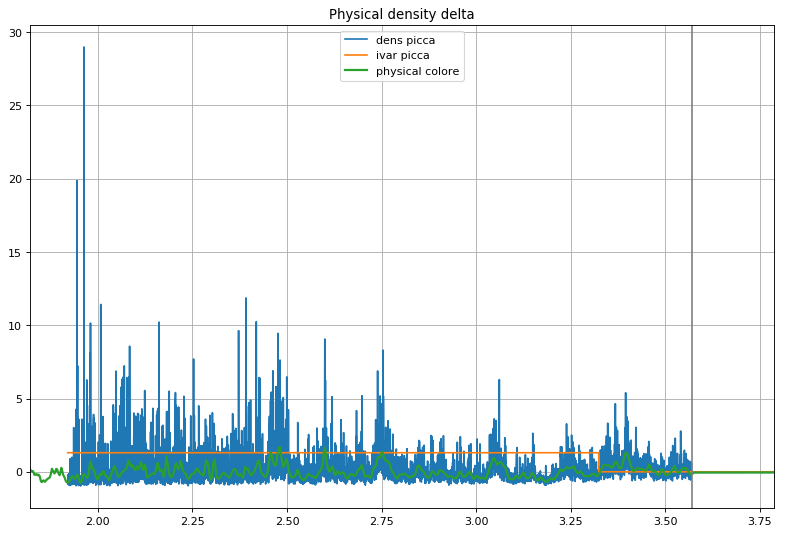

In [24]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_dens_delta[:,iskewer],label='dens picca')
plt.plot(picca_zs,sigma_D*picca_ivar[:,iskewer],label='ivar picca')
plt.plot(phys_dens_zs,phys_dens[iskewer],lw=2,label='physical colore')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.xlim(np.min(picca_zs)-0.1,np.max(picca_zs))
plt.title('Physical density delta')
plt.legend()
plt.grid()
plt.show()

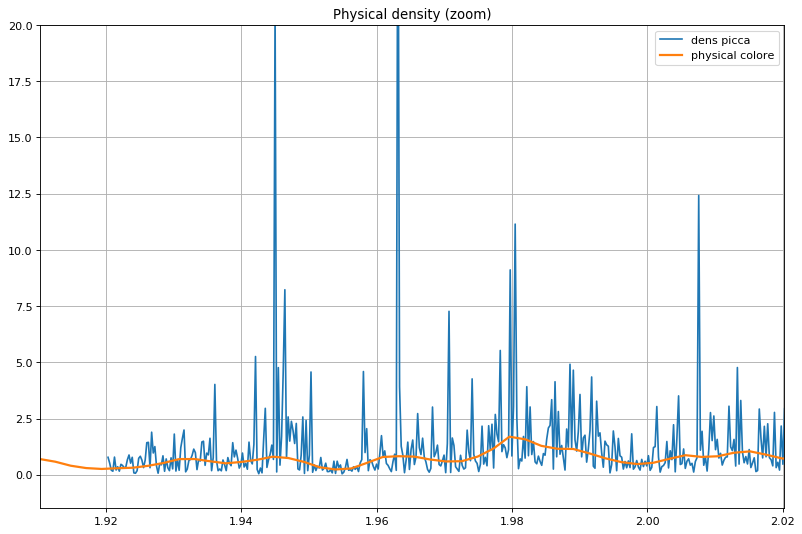

In [25]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_dens_delta[:,iskewer]+1,label='dens picca')
plt.plot(phys_dens_zs,phys_dens[iskewer]+1,lw=2,label='physical colore')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.xlim(np.min(picca_zs)-0.01,np.min(picca_zs)+0.1)
plt.ylim(ymax=20)
plt.title('Physical density (zoom)')
#plt.semilogy()
plt.legend()
plt.grid()
plt.show()

In [26]:
# picca flux
picca_flux_file = dirname+'/picca-flux-'+suffix
print('picca flux file\n',picca_flux_file)
picca_flux_hdu = fits.open(picca_flux_file)
picca_flux_hdu.info()
picca_flux_delta = picca_flux_hdu[0].data
picca_flux_hdu.close()

picca flux file
 /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//picca-flux-16-1096.fits
Filename: /Users/James/Projects/LyaCoLoRe/example_data/update_270418//10/1096//picca-flux-16-1096.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  CATALOG       1 PrimaryHDU      11   (9, 5477)   float64   
  1  IV            1 ImageHDU        12   (9, 5477)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5477,)   float64   
  3  CATALOG       1 BinTableHDU     27   9R x 7C   [E, E, E, K, E, K, K]   


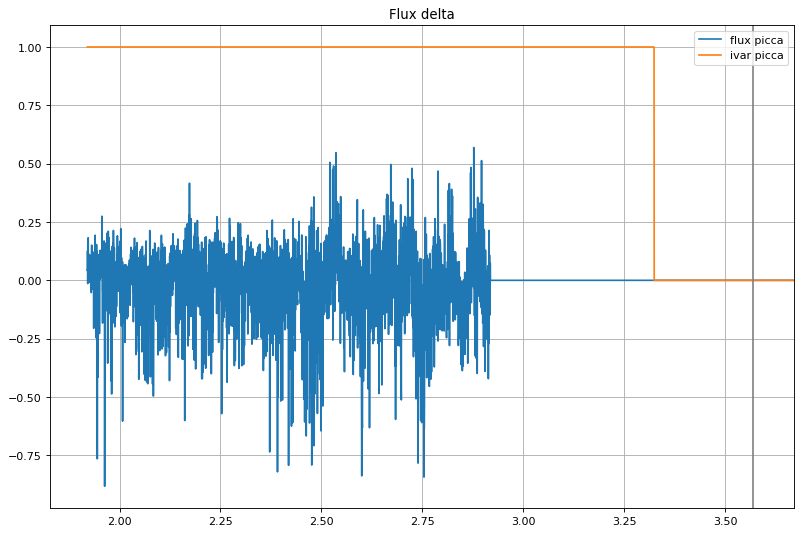

In [27]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(picca_zs,picca_flux_delta[:,iskewer],label='flux picca')
plt.plot(picca_zs,picca_ivar[:,iskewer],label='ivar picca')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.xlim(xmax=zq[iskewer]+0.1)
plt.title('Flux delta')
plt.legend()
plt.grid()
plt.show()